In [5]:
import pandas as pd
import json
import random

random.seed(42)

In [6]:
from PIL import Image
import base64
from io import BytesIO
import torchvision.transforms as transforms
from typing import List
import torch
random.seed(42)
device = torch.device("cuda")
with open('./json_data_result1.json', 'r') as f:
    raw_data: dict = json.load(f)

input_list: List[torch.Tensor] = []
weapon_set = set()
expected_output_list = []
expected_output_tensors = []
cap_set = set()
datas = {}
def add_datas(K, V):
    if K not in datas:
        datas[K] = []
    datas[K].append(V)

transform = transforms.Compose([
    transforms.ToTensor(),
    # normalize
])
for crt_name, avatar_info_list in raw_data.items():
    for avatar_info in avatar_info_list:
        weapon_image_b64 = avatar_info["weapon_image"]
        if weapon_image_b64 == "":
            continue
        if avatar_info["cap_image"] == "":
            continue
        add_datas(avatar_info["weapon"], (avatar_info["cap"], avatar_info["cap_image"]))

        weapon_set.add(
            (avatar_info["weapon"], weapon_image_b64)
        )
        cap_set.add(avatar_info["cap"])
inv_dict = {}
cap_dict = {}
for idx, val in enumerate(cap_set):
    inv_dict[val] = idx
    cap_dict[idx] = val
cap_num = len(cap_set)
expected_output_tensors = []

EDA_Data = []
for (weapon, weapon_image_b64) in weapon_set:
    weapon_image = Image.open(BytesIO(base64.b64decode(weapon_image_b64)))
    weapon_image = weapon_image.convert("RGB")
    # weapon_image = weapon_image.resize((224,224), Image.ANTIALIAS)
    input_list.append(transform(weapon_image))
    L = datas[weapon]
    output = torch.zeros(cap_num)
    Q = []
    weapon_image.show()
    print("-"*20)
    for cap, cap_img_b64 in L:
        cap_image = Image.open(BytesIO(base64.b64decode(cap_img_b64)))
        cap_image = cap_image.convert("RGB")
        cap_image.show()
        output[inv_dict[cap]] += 1
        Q.append(inv_dict[cap])
    print("-"*20)
    EDA_Data.append(Q)
    output = output.div(torch.sum(output))
    expected_output_tensors.append(output)
print(len(input_list))


FileNotFoundError: [Errno 2] No such file or directory: './json_data_result_1_3000.json'

<AxesSubplot:>

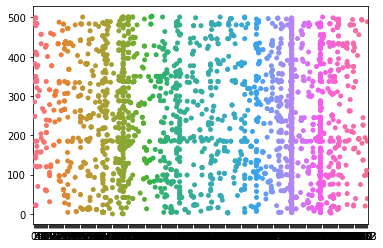

In [13]:
import seaborn as sns

# for i in range(0, 10):
#     print(len(EDA_Data[i]))
sns.stripplot(EDA_Data)